# Multiple Movements

Let's see how our robot responds to moving multiple times without sensing!

<img src='images/uncertain_motion.png' width=50% height=50% />


First let's include our usual resource imports and display function.

In [1]:
# importing resources
from typing import List
import matplotlib.pyplot as plt
import numpy as np

A helper function for visualizing a distribution.

In [2]:
def display_map(grid: List[float], bar_width: int = 1) -> None:
    """Creates a bar chart to show the probabilities for a robot to 
    be in each of the 1D grid cell.
    """
    if(len(grid) > 0):
        x_labels: range = range(len(grid))
        plt.bar(x_labels, height=grid, width=bar_width, color='b')
        plt.xlabel('Grid Cell')
        plt.ylabel('Probability')
        plt.ylim(0, 1) # range of 0-1 for probability values 
        plt.title('Probability of the robot being at each cell in the grid')
        plt.xticks(np.arange(min(x_labels), max(x_labels)+1, 1))
        plt.show()
    else:
        print('Grid is empty')

### QUIZ: Write code that moves 1000 times and then prints the resulting probability distribution.

You are given the initial variables and a complete `move` function (that incorporates uncertainty), below.

In [3]:
# given initial variables
p: List[float] = [0, 1, 0, 0, 0]
# the color of each grid cell in the 1D world
world: List[str] = ['green', 'red', 'red', 'green', 'green']
# Z, the sensor reading ('red' or 'green')
Z: str = 'red'
pHit: float = 0.6
pMiss: float  = 0.2

In [4]:
# This time we are having another version of the sense function than the prior notebook.
# This version of the solution is a bit more numeric, which should come handy when we move 
# to 2D and 3D worlds.
def sense(p: List[float], Z: str) -> List[float]:
    """Takes in a current probability distribution, p, and a sensor reading, Z.
    Returns an nonnormalized distribution after the sensor measurement has been made, q.
    This should be accurate whether Z is 'red' or 'green'.
    
    Args:
        p: Prior probability distribution to sensor measurements
        Z: Cell color
    
    Returns:
        Normalized posterior probability distribution
    """
    q: List[float] = []
    # Iterate through all grid cells
    for prob, cell_color in zip(p, world):
        # check if the sensor reading is equal to the color of the grid cell
        # if so, hit = 1
        # if not, hit = 0
        hit: int = (Z == cell_color)
        # if hit - 1, we multiply the probability with pHit, because (1 - hit) = 0
        # If hit = 0, we multiply the probability with pMis, because (1 - hit) = 1
        q.append(prob * (hit * pHit + (1-hit) * pMiss))

    # Normalize q
    q = (np.array(q) / np.sum(q)).tolist()
    return q

# Commented out code for measurements
# for k in range(len(measurements)):
#     p = sense(p, measurements)


In [5]:
## TODO: Modify the move function to accommodate the added robabilities of overshooting or undershooting 
pExact: float = 0.8
pOvershoot: float = 0.1
pUndershoot: float = 0.1

In [6]:
## TODO: Complete this move function so that it shifts a probability distribution, p
## by a given motion, U
def move(p: List[float], U: int) -> List[float]:
    """We are considering the robot motion in 1D world represented 
    by a cyclic array / list, means when the robot moves 1 step to 
    the right from the last cell of the array it ends up coming to 
    the first cell. In order to model this probability distribution 
    also shifts one step to he right. This function implements that.
    
    Args:
        p: Starting probability distribution
        U: Number of steps for robot motion
    
    Returns:
        Shifted probability distribution resulting from the motion
    """
    q: List[float] = []
    if len(p) == 0:
        return q
    for idx in range(len(p)):
        index: int = (idx - U) % len(p)
        prevIndex: int = (index - 1) % len(p)
        nextIndex: int = (index + 1) % len(p)
        val: float = pExact * p[index]
        val = val + pUndershoot * p[prevIndex]
        val = val + pOvershoot * p[nextIndex]
        q.append(val)
    return q

[0.010000000000000002, 0.010000000000000002, 0.16000000000000003, 0.6600000000000001, 0.16000000000000003]


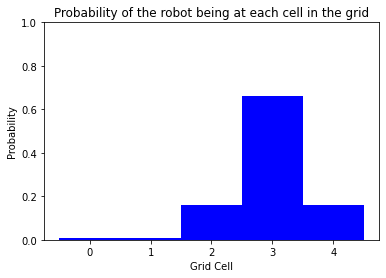

In [7]:
# Here is code for moving twice
p = move(p, 1)
p = move(p, 1)
print(p)
display_map(p)

[0.20000000000000365, 0.20000000000000373, 0.20000000000000365, 0.2000000000000035, 0.2000000000000035]


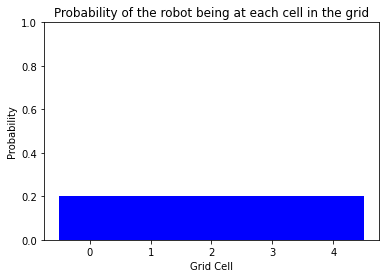

In [9]:
## TODO: Write code for moving 1000 times
p: List[float] = [0, 1, 0, 0, 0]
for _ in range(1000):
    p = move(p, 1)
print(p)
display_map(p)